# ****KÜTÜPHANLERİMİZİ TANIYALIM***# 

***Numpy Kütüphanesi*** : Numpy kütüphanesi aritmetik işlmeler için kullanılır ayrıca projede kullanılar diğre kütüphanelerin (pandas tensorflow gibi ) içinde de bulunur

***Pandas Kütüphanesi*** : Pandas kütüphanesi veri bilimi denince akla gelen ilk kütüphanedir. Verileri okumak ve üzerinde işlemler yapmak için kullanılan en işlevli kütüphanedir

***Matplotlib Kütüphanesi*** : Verilerin görselleştirilmesi sağlar

***Seborn Kütüphanesi*** : İstatiskilerin görselleşmesi için



In [1]:
import os # Veriyi okumak için
import numpy as np # Matematiksel işlemler 
import pandas as pd # Veri setinin okunması ve gözlemlenmesi için
import seaborn as sns #İstatistiksel veri görselleştirme kütüphanesi
import tensorflow as tf # Modeli kurmak için
import matplotlib.pyplot as plt # Veriyi ve modeli incelemek için 

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.image import ImageDataGenerator



for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/a-large-scale-fish-dataset/Segmentation_example_script.m
/kaggle/input/a-large-scale-fish-dataset/README.txt
/kaggle/input/a-large-scale-fish-dataset/license.txt
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00033.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00004.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00023.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00041.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00024.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00035.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00045.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00038.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/00025.png
/kaggle/input/a-large-scale-fish-dataset/NA_Fish_Dataset/Black Sea Sprat/0000

Projemde Sequential API kullanmaya kara verdim.

Aktivasyon fonksiyonu olarak da Relu kullanmaya kara verdim. Relu kullanmamının avantajı doğruluk oranın yüksek olup aynı zamanda hızlı bir şekilde eğitmesidir. Daha fazla doğruluk oranı veren fonksiyonlar yada daha hızlı eğitilen fonksiyonlar da var ama hız ile doğruluk oranı arasında ters orantı bulunduğu için relu bu iki parametre göz önüne alındığında gayet başarılı bir fonksiyondur

Hadi biraz veri seti ile uğraşalım :)

In [2]:
balıklar = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset' 
sınıf = [i for i in os.listdir(balıklar) if '.' not in i]                    
sınıf

#Buradaki kod satırı ile balıklar veri setindeki balık sınıflarını görmüş oluyoruz

['Hourse Mackerel',
 'Black Sea Sprat',
 'Sea Bass',
 'Red Mullet',
 'Trout',
 'Striped Red Mullet',
 'Shrimp',
 'Gilt-Head Bream',
 'Red Sea Bream']

In [3]:
etiket = []
yol = []

for dir_name, _,filenames in os.walk(balıklar):                    
    for filename in filenames:                                 
        etiket.append(os.path.split(dir_name)[-1])     
        yol.append(os.path.join(dir_name,filename))  

data = pd.DataFrame(columns=['yol','etiket']) 
data['yol']=yol
data['etiket']=etiket
#değişkenlere yol ve tiket ataması yapar

In [4]:
data['etiket'].value_counts()
#Buradaki value_counts ifadesi pandas kütüphandesinden gelip veride hangi etiketden kaç tane veri olduğunu gösterir. 

etiket
Hourse Mackerel          1000
Hourse Mackerel GT       1000
Black Sea Sprat GT       1000
Striped Red Mullet GT    1000
Black Sea Sprat          1000
Sea Bass                 1000
Sea Bass GT              1000
Red Mullet               1000
Red Mullet GT            1000
Trout                    1000
Trout GT                 1000
Gilt-Head Bream GT       1000
Striped Red Mullet       1000
Shrimp GT                1000
Shrimp                   1000
Red Sea Bream            1000
Gilt-Head Bream          1000
Red Sea Bream GT         1000
Fish_Dataset                3
Name: count, dtype: int64

In [5]:
data.head()
#İlk 5 data hakkında bilgi

,yol,etiket
0,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Fish_Dataset
1,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Fish_Dataset
2,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Fish_Dataset
3,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
4,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel


In [6]:
data.yol[0]
#İlk veriyi tanımamıza yol bakımından tanıma

'/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Segmentation_example_script.m'

In [7]:
batch_size = 128
img_boyu = 224
img_genişlik = 224

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2)  
#Veriler tam sayı şeklinde verileri daha hızlı şeklide öğrenmek açısından bu verileri 255 bölüp 0 ila 1 arasına sıkıştıralım

In [9]:
eğitim_verisi = train_datagen.flow_from_directory(
    directory=balıklar,
    target_size=(img_boyu, img_genişlik),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical')

test_verisi = train_datagen.flow_from_directory(
    directory=balıklar,
    target_size=(img_boyu, img_genişlik),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical')

Found 14400 images belonging to 9 classes.
Found 3600 images belonging to 9 classes.


In [10]:
#Kaç sınıf var onu değişken atayalım ve öğrenelim 
sınıf_sayısı= len(eğitim_verisi.class_indices)
sınıf_sayısı

9

# ANN MİMARİMİZİ KURALIM

In [11]:

model = tf.keras.models.Sequential([
  # Giriş katmanımız 
    
  tf.keras.layers.InputLayer((img_boyu, img_genişlik, 3)),
  tf.keras.layers.Flatten(),
    # Gizli Katmalarımız
  tf.keras.layers.Dense(512, activation='relu'),#Relu fonksiyonunu kullanma sebebimizi yukarıda belirtmiştik
   tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256, activation='relu'),
   tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='relu'),
   tf.keras.layers.Dropout(0.2),
  # Çıkış katamnı (Burada 9 nöon olmasının sebebi yukarıda bakktığımız gibi 9 farklı katogori sınıflandırma yapıcağımız için)
  tf.keras.layers.Dense(9,activation="softmax")
])

#Model eğitimi için derleme kısmı
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])
              

In [12]:
model.summary #Model özeti

<bound method Model.summary of <Sequential name=sequential, built=True>>

In [13]:
Callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3) 
#Callback apısı kullanma sebebimiz değerlerimizi izlemek, ve eğitim sırasında iç durum ve istatistik izlemek için bunu da periyodik olarak değerleri diske kaydederek yapar

In [14]:
history  = model.fit(eğitim_verisi,
                validation_data  = test_verisi,
                epochs = 100, callbacks=Callback)
#Başa düştüğüm not gibi şu anda kullandığım bilgisayar yetesiz ve ancak 15 epochs eğitebilidim eğer devam edebilirsem tahminlerime göre doğruluk oranı yaklaşık %95 olucaktır

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1729600261.134739      85 service.cc:145] XLA service 0x7a231c003e10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729600261.134795      85 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1729600261.134800      85 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  2/113 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.1445 - loss: 7.8385  

I0000 00:00:1729600266.889340      85 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


113/113 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.1661 - loss: 9.3100 - val_accuracy: 0.2481 - val_loss: 2.0477
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 118s 999ms/step - accuracy: 0.2769 - loss: 1.8654 - val_accuracy: 0.2567 - val_loss: 1.9602
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.3393 - loss: 1.6926 - val_accuracy: 0.2858 - val_loss: 1.7466
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.3647 - loss: 1.6143 - val_accuracy: 0.2322 - val_loss: 1.8730
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.3863 - loss: 1.5504 - val_accuracy: 0.3394 - val_loss: 1.7251
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.4042 - loss: 1.5207 - val_accuracy: 0.1975 - val_loss: 2.0345
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.3956 - loss: 1.5404 - val_accuracy: 0.3661 - val_loss: 1.6964
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.4284 - loss: 1.4560 - val_accur

In [15]:
results = model.evaluate(eğitim_verisi)

113/113 ━━━━━━━━━━━━━━━━━━━━ 81s 720ms/step - accuracy: 0.8105 - loss: 0.5385


Doğruluk oranımıza bakalım 

In [16]:
print("LOSS:  " + "%.4f" % results[0])
print("ACCURACY:  " + "%.2f" % results[1]) 

LOSS:  0.5392
ACCURACY:  0.81


Test ve öğrenim değerlerini grafiğe dökelim 

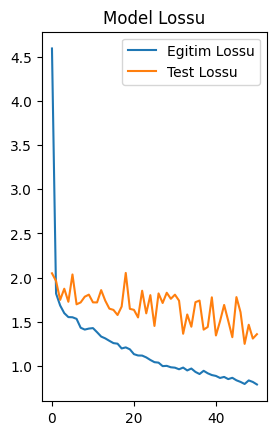

Text(0.5, 1.0, 'Model Dogurlugu')

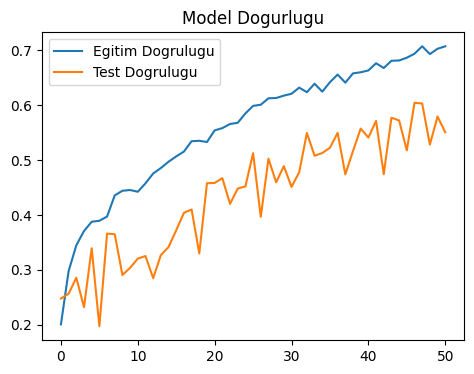

In [17]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Egitim Lossu')
plt.plot(history.history['val_loss'], label='Test Lossu')
plt.legend()
plt.title('Model Lossu')
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Egitim Dogrulugu')
plt.plot(history.history['val_accuracy'], label='Test Dogrulugu')
plt.legend()
plt.title('Model Dogurlugu')